### Import reddit Graph

Discussion and non-discussion based threads from Reddit which we collected in May 2018. Nodes are Reddit users who participate in a discussion and links are replies between them. The task is to predict whether a thread is discussion based or not (binary classification).

sources:  
https://arxiv.org/abs/2003.04819  
http://snap.stanford.edu/data/reddit_threads.html  
https://karateclub.readthedocs.io/en/latest/notes/introduction.html

In [1]:
import numpy as np
import networkx as nx

In [2]:
from karateclub.dataset import GraphSetReader

reader = GraphSetReader("reddit10k")

graphs = reader.get_graphs()
y = reader.get_target()

### Extract information from graphs

In [4]:
print(graphs[1])
print(graphs[1].nodes)
print(graphs[1].edges)
print(y, np.shape(y))

Graph with 13 nodes and 12 edges
[0, 3, 6, 1, 8, 2, 4, 5, 7, 9, 10, 11, 12]
[(0, 3), (0, 6), (6, 8), (1, 8), (8, 2), (8, 4), (8, 5), (8, 7), (8, 9), (8, 10), (8, 11), (8, 12)]
[0 1 0 ... 0 0 0] (10000,)


### Plot graphs

In [5]:
import matplotlib.pyplot as plt

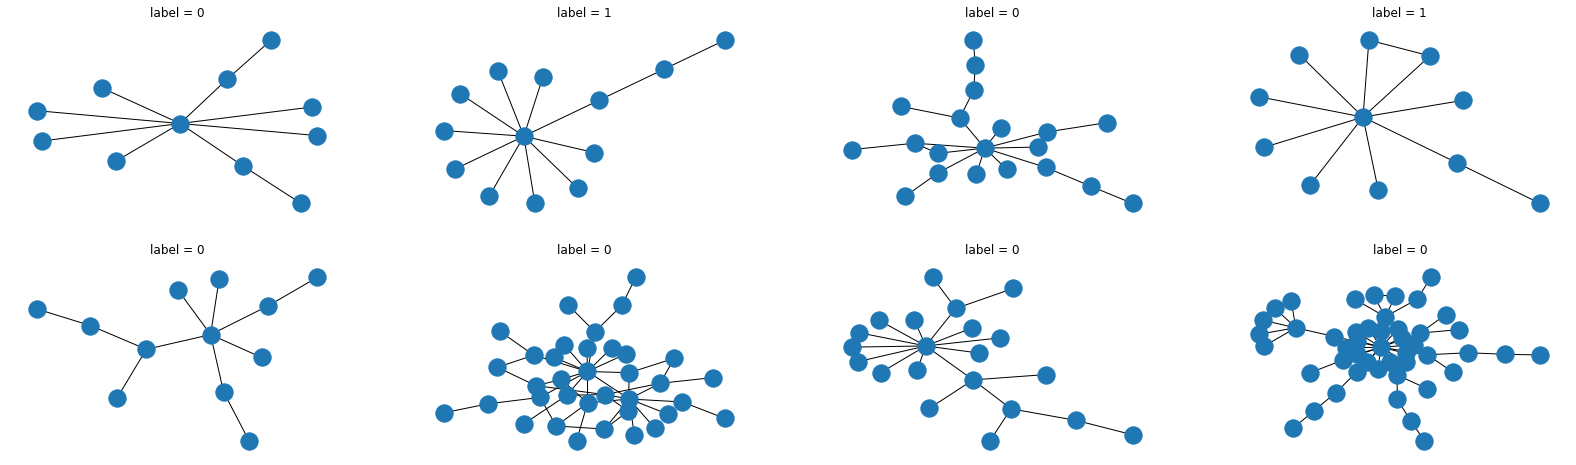

In [6]:
rows = 2
cols = 4

plt.figure(figsize = (7 * cols, 4 * rows))
for ix in range(0, rows * cols):
    plt.subplot(rows, cols, ix+1)
    plt.title("label = %i" % y[ix])
    nx.draw_kamada_kawai(graphs[ix])

In [10]:
from karateclub import FeatherGraph

model = FeatherGraph()
model.fit(graphs)
X = model.get_embedding()

/home/cvadim/Learning/IC/IC_venv/lib/python3.8/site-packages/karateclub/graph_embedding/feathergraph.py:110: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(graph, nodelist=range(self.n_nodes))


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_hat)
print('AUC: {:.4f}'.format(auc))

AUC: 0.8171


/home/cvadim/Learning/IC/IC_venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
